In [74]:
pip install pandas

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/converted - Copy.csv")
data.head()

,text,label
0,these tiktoks radiate gay chaotic energy and i...,1
1,@Champions Again He got killed for using false...,1
2,It's not that all lives don't matter,1
3,Is it really that difficult to understand? Bla...,1
4,Whenever we say black isn't that racists? Why...,1


In [77]:
data.shape

(22743, 2)

In [78]:
data.label.value_counts()

1    20781
0     1962
Name: label, dtype: int64

In [79]:
X = data.iloc[:,:-1]
y = data.label
X.head()

,text
0,these tiktoks radiate gay chaotic energy and i...
1,@Champions Again He got killed for using false...
2,It's not that all lives don't matter
3,Is it really that difficult to understand? Bla...
4,Whenever we say black isn't that racists? Why...


In [80]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-80-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
0,21011
1,897
2,11073
3,10712
4,18228


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label'], stratify=data['label'])

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [84]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.915933872669715

In [85]:
y_predict = model.predict(X_test_count)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[ 106,  385],
       [  93, 5102]])

Text(50.722222222222214, 0.5, 'Truth')

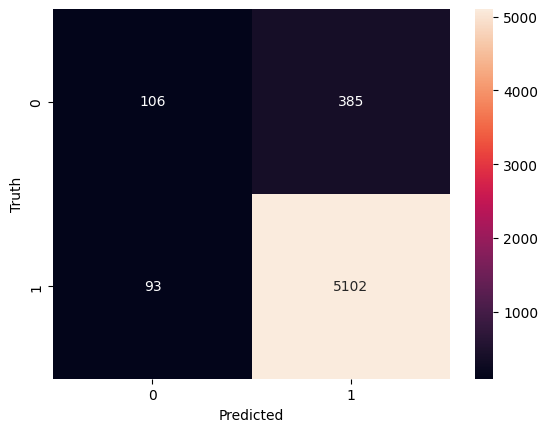

In [87]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.22      0.31       491
           1       0.93      0.98      0.96      5195

    accuracy                           0.92      5686
   macro avg       0.73      0.60      0.63      5686
weighted avg       0.90      0.92      0.90      5686



# Under Sampling

In [89]:
df_hope = data[data['label']==0]
df_nhope = data[data['label']==1]
df_nhope_downsampled = df_nhope.sample(df_hope.shape[0])
df_nhope_downsampled.shape

(1962, 2)

In [90]:
df_balanced = pd.concat([df_hope, df_nhope_downsampled])
df_balanced.shape

(3924, 2)

In [91]:
X = df_balanced.iloc[:,:-1]
y = df_balanced.label
X.head()

,text
9,Network Engineer here- 23 and currently workin...
19,I'm still hiding my gender to my parents and t...
20,all lives matter .without that we never have p...
26,Randomgirlwhosings0804 Why does she feel the n...
45,it doesn't matter what your family does when y...


In [92]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-92-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
9,2332
19,1874
20,3441
26,2505
45,3576


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'],df_balanced['label'], stratify=df_balanced['label'])

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [96]:
stmt = [
    'The World is a better place',
    'i should probably die'
]
stmt_count = v.transform(stmt)
model.predict(stmt_count)

array([1, 1])

In [97]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.7329255861365953

In [98]:
y_predict = model.predict(X_test_count)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[459,  31],
       [231, 260]])

Text(50.722222222222214, 0.5, 'Truth')

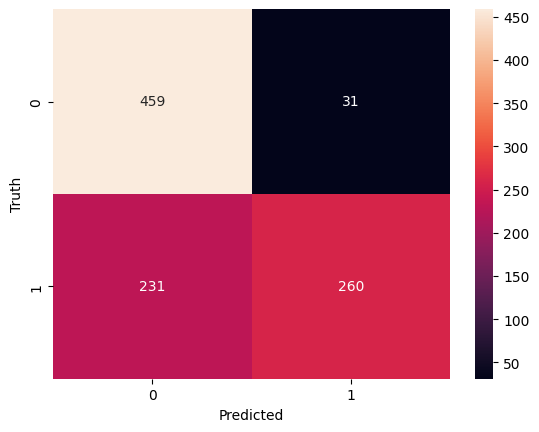

In [100]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [101]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       490
           1       0.89      0.53      0.66       491

    accuracy                           0.73       981
   macro avg       0.78      0.73      0.72       981
weighted avg       0.78      0.73      0.72       981



# Over Sampling

In [102]:
X = data.iloc[:,:-1]
y = data.label
X.head()

,text
0,these tiktoks radiate gay chaotic energy and i...
1,@Champions Again He got killed for using false...
2,It's not that all lives don't matter
3,Is it really that difficult to understand? Bla...
4,Whenever we say black isn't that racists? Why...


In [103]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-103-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
0,21011
1,897
2,11073
3,10712
4,18228


In [104]:
df_hope_oversample = df_hope.sample(df_nhope.shape[0], replace=True)
df_over = pd.concat([df_hope_oversample, df_nhope], axis=0)

print('Random over-sampling:')
print(df_over.label.value_counts())

Random over-sampling:
0    20781
1    20781
Name: label, dtype: int64


In [105]:
X = df_over.iloc[:,:-1]
y = df_over.label
X.head()

,text
2640,When I told my friends that I really wanted to...
18132,Bea Millan-Windorski i go by stats. women are ...
10381,Nothing is stopping woman from being engineers.
21891,80s baby here. Madonna was made by the lgbtq c...
4510,You can’t gain respect without giving it first...


In [106]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-106-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
2640,18137
18132,5513
10381,13078
21891,267
4510,19142


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_over['text'],df_over['label'], stratify=df_over['label'])

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [110]:
stmt = [
    'The World is a better place',
    'i should probably die'
]
stmt_count = v.transform(stmt)
model.predict(stmt_count)

array([1, 0])

In [111]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.8552593590607256

In [112]:
y_predict = model.predict(X_test_count)

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[5001,  195],
       [1309, 3886]])

Text(50.722222222222214, 0.5, 'Truth')

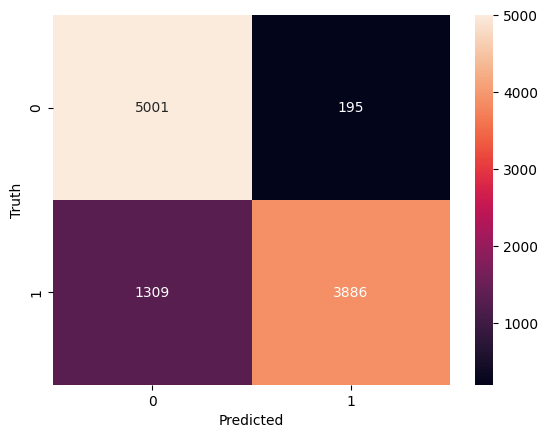

In [114]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      5196
           1       0.95      0.75      0.84      5195

    accuracy                           0.86     10391
   macro avg       0.87      0.86      0.85     10391
weighted avg       0.87      0.86      0.85     10391



# SMOTE

In [116]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label'], stratify=data['label'])

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [119]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_count.astype('float'),y_train)

In [120]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1: 15586, 0: 1471})
After SMOTE : Counter({1: 15586, 0: 15586})


In [121]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [122]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9194512838550827

In [123]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_count)

In [124]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[ 380,  111],
       [1211, 3984]])

Text(50.722222222222214, 0.5, 'Truth')

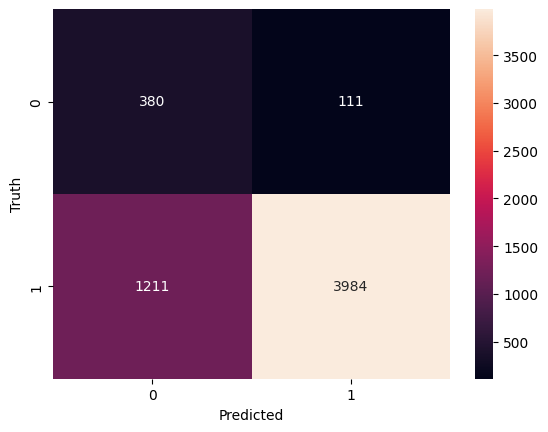

In [125]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [126]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.24      0.77      0.37       491
           1       0.97      0.77      0.86      5195

    accuracy                           0.77      5686
   macro avg       0.61      0.77      0.61      5686
weighted avg       0.91      0.77      0.82      5686

